In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import skew, kurtosis
from matplotlib.cm import ScalarMappable

In [2]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, Descriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole

from itertools import combinations

import IPython
from IPython.display import display, Image
from PIL import Image

import numpy as np
import pandas as pd

import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the data from the text file and split by space
with open('data_test.txt', 'r') as file:
    lines = file.readlines()
    data_list = [line.strip().split() for line in lines]

# Create DataFrame from the list
data_df = pd.DataFrame(data_list, columns=['SMILES', 'Value'])

In [4]:
data_df.head()
data_df['Value'] = data_df['Value'].astype(float)

In [5]:
# Add a new column for molecular weight
data_df['Molecular_Weight'] = data_df['SMILES'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
data_df.head()

,SMILES,Value,Molecular_Weight
0,[nH]1c2ccoc2c2sc3cc(-c4ccco4)c4=C[SiH2]C=c4c3c12,4.308645,333.444
1,c1cc2c3nsnc3c(cc2cn1)C1=Cc2c(C1)ccc1=C[SiH2]C=c21,7.942815,355.498
2,c1sc(C2=Cc3ncc4c5ccccc5c5ccccc5c4c3[SiH2]2)c2o...,3.104032,405.554
3,[nH]1c2cc(-c3ncncn3)c3=CCC=c3c2c2c3cocc3c3ccc4...,4.003583,412.452
4,[nH]1c2cc(oc2c2c3nsnc3c3ccc4=C[SiH2]C=c4c3c12)...,8.470432,395.519


In [6]:
# Summary statistics for molecular weight
# Descriptive statistics
print("Descriptive Statistics of Molecular Weight:")
print(data_df['Molecular_Weight'].describe())


# Compute metrics for violin plot
median = np.median(data_df['Molecular_Weight'])
q1, q3 = np.percentile(data_df['Molecular_Weight'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Compute metrics for KDE plot
mode = data_df['Molecular_Weight'].mode().iloc[0]  # Mode may have multiple values, so we select the first one
skewness = skew(data_df['Molecular_Weight'])
kurt = kurtosis(data_df['Molecular_Weight'])

# Compute metrics for histogram
mean = np.mean(data_df['Molecular_Weight'])
std_dev = np.std(data_df['Molecular_Weight'])

print("################################################")
print("################Metrics for KDE Plot################")
print(f"Mode: {mode}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")
print("################################################")
print("################Metrics for Histogram################")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print("################################################")

Descriptive Statistics of Molecular Weight:
count    2998.000000
mean      414.714373
std        61.584823
min       183.210000
25%       377.468000
50%       415.566000
75%       456.115750
max       639.470000
Name: Molecular_Weight, dtype: float64
################################################
################Metrics for KDE Plot################
Mode: 408.51100000000014
Skewness: -0.15440375981651716
Kurtosis: 0.09156711897966652
################################################
################Metrics for Histogram################
Mean: 414.71437324883277
Standard Deviation: 61.574551627745436
################################################


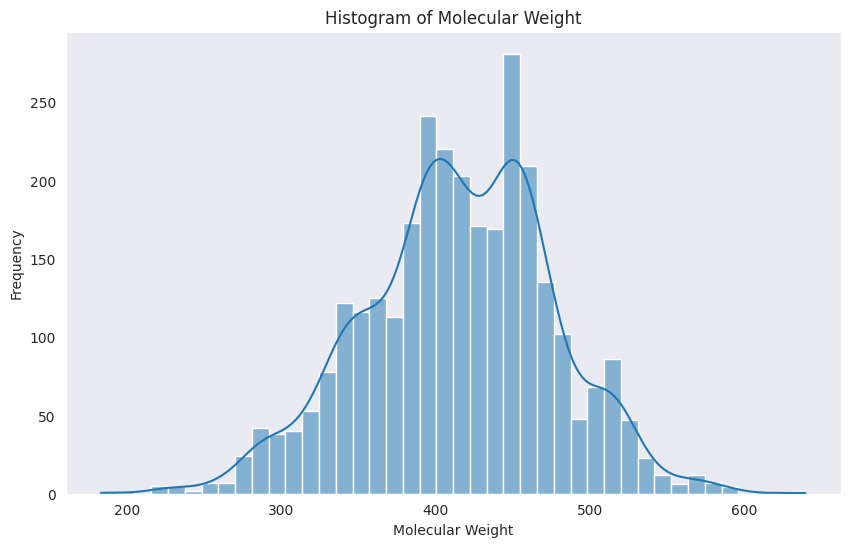

In [7]:

# Set the style
sns.set_style("dark")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_df['Molecular_Weight'], kde=True)
plt.title('Histogram of Molecular Weight')
plt.xlabel('Molecular Weight')
plt.ylabel('Frequency')
plt.show()



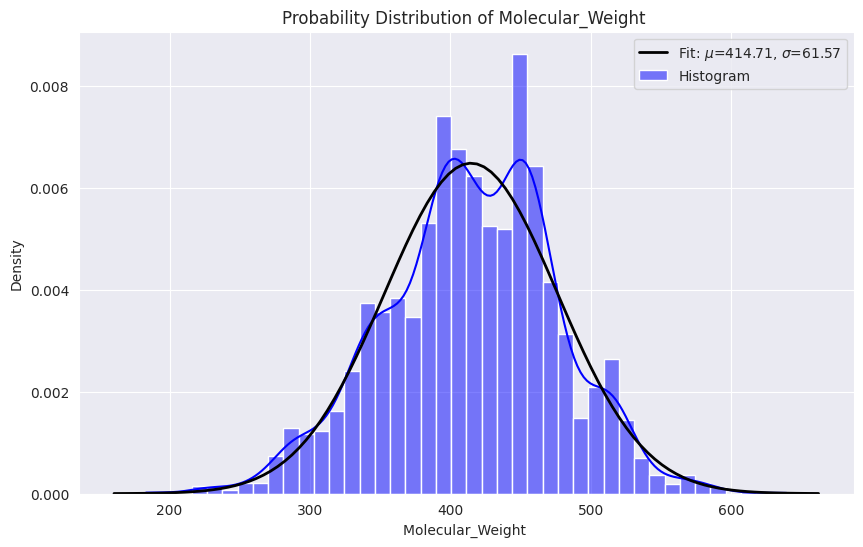

In [8]:
# Fit a probability distribution to the Molecular_Weight  data
sns.set_style("dark")
plt.figure(figsize=(10, 6))
sns.histplot(data_df['Molecular_Weight'], kde=True, color='blue', stat='density', label='Histogram')

# Fit a normal distribution to the data
mu, std = norm.fit(data_df['Molecular_Weight'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Fit: $\mu$={mu:.2f}, $\sigma$={std:.2f}')

plt.title('Probability Distribution of Molecular_Weight ')
plt.xlabel('Molecular_Weight ')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Descriptive Statistics of Numer of Atoms:
count    2998.000000
mean       27.655771
std         3.459608
min        14.000000
25%        25.000000
50%        28.000000
75%        30.000000
max        35.000000
Name: Num_Atoms, dtype: float64
################################################
################Metrics for KDE Plot################
Mode: 28
Skewness: -0.6418250310899924
Kurtosis: -0.06816830013281194
################################################
################Metrics for Histogram################
Mean: 3.9311149242828547
Standard Deviation: 2.581190960058479
################################################


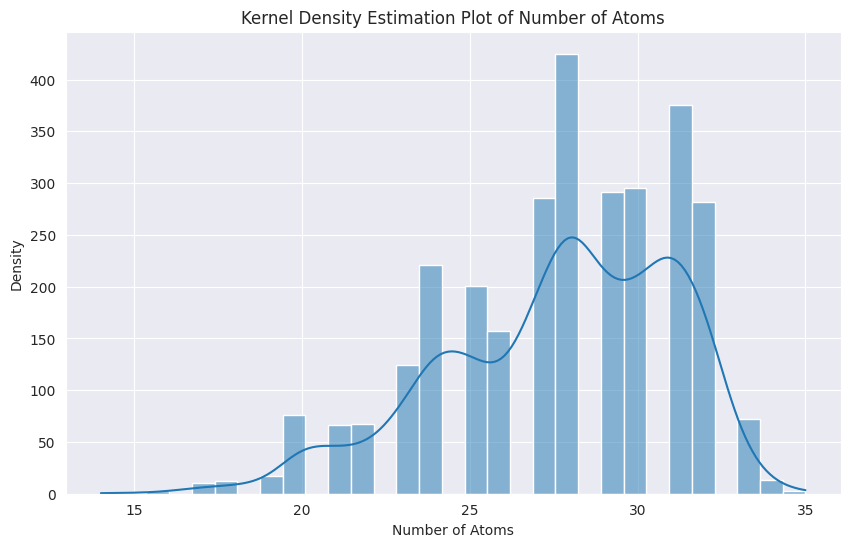

In [9]:
######## Number of atoms for each###
def count_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        num_atoms = mol.GetNumAtoms()
        return num_atoms
    else:
        return None

# Add a new column for the number of atoms
data_df['Num_Atoms'] = data_df['SMILES'].apply(count_atoms)

# Drop rows where the molecule couldn't be parsed
data_df.dropna(subset=['Num_Atoms'], inplace=True)

# Compute metrics for violin plot
median = np.median(data_df['Num_Atoms'])
q1, q3 = np.percentile(data_df['Num_Atoms'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Compute metrics for KDE plot
mode = data_df['Num_Atoms'].mode().iloc[0]  # Mode may have multiple values, so we select the first one
skewness = skew(data_df['Num_Atoms'])
kurt = kurtosis(data_df['Num_Atoms'])

# Compute metrics for histogram
mean = np.mean(data_df['Value'])
std_dev = np.std(data_df['Value'])


# Descriptive statistics
print("Descriptive Statistics of Numer of Atoms:")
print(data_df['Num_Atoms'].describe())

print("################################################")
print("################Metrics for KDE Plot################")
print(f"Mode: {mode}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")
print("################################################")
print("################Metrics for Histogram################")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print("################################################")


# Set the style
sns.set_style("dark")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_df['Num_Atoms'], kde=True)
plt.title('Kernel Density Estimation Plot of Number of Atoms')
plt.xlabel('Number of Atoms')
plt.ylabel('Density')
plt.grid(True)
plt.show()


# # Violin plot
# sns.set_style("dark")
# plt.figure(figsize=(10, 6))
# sns.violinplot(x=data_df['Num_Atoms'], color='lightgreen')
# plt.title('Violin Plot of Number of Atoms')
# plt.xlabel('Number of Atoms')
# plt.ylabel('Density')
# plt.grid(True)
# plt.show()

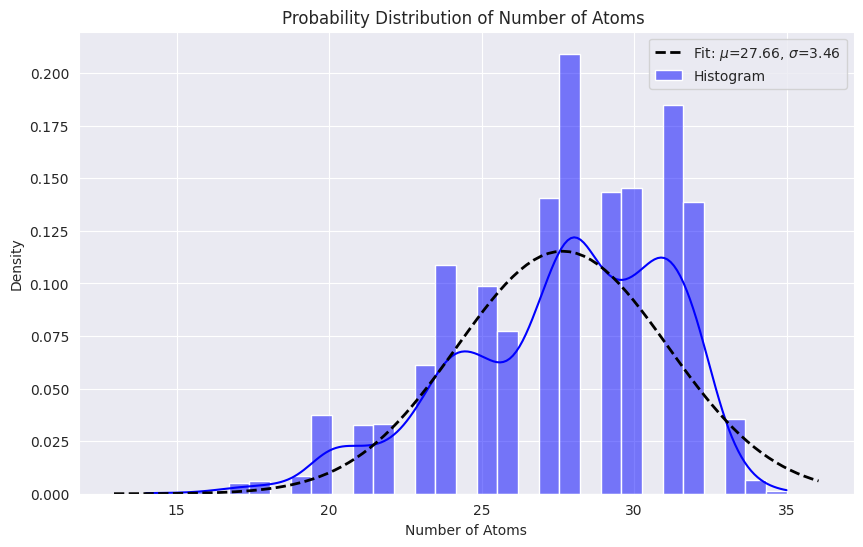

In [10]:

# Fit a probability distribution to the Molecular_Weight  data
sns.set_style("dark")
plt.figure(figsize=(10, 6))
sns.histplot(data_df['Num_Atoms'], kde=True, color='blue', stat='density', label='Histogram')

# Fit a normal distribution to the data
mu, std = norm.fit(data_df['Num_Atoms'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k--', linewidth=2, label=f'Fit: $\mu$={mu:.2f}, $\sigma$={std:.2f}')

plt.title('Probability Distribution of Number of Atoms ')
plt.xlabel('Number of Atoms')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# # Fit a probability distribution to the photovoltaic efficiency data
# sns.set_style("dark")
# plt.figure(figsize=(10, 6))
# sns.histplot(data_df['Num_Atoms'], kde=True, color='skyblue', stat='density', label='Histogram')

# # Fit a normal distribution to the data
# mu, std = norm.fit(data_df['Value'])
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2, label=f'Fit: $\mu$={mu:.2f}, $\sigma$={std:.2f}')

# plt.title('Probability Distribution of Number of Atoms')
# plt.xlabel('Number of Atoms in each molecule')
# plt.ylabel('Density')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Set the style

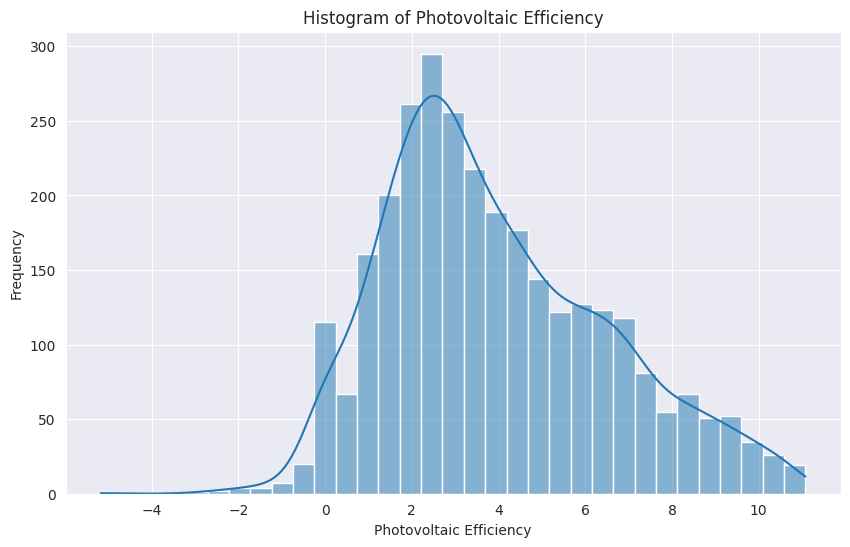

In [11]:

# Histogram of molecular weight

sns.set_style("dark")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_df['Value'],kde=True)
plt.title('Histogram of Photovoltaic Efficiency')
plt.xlabel('Photovoltaic Efficiency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [12]:
# Descriptive statistics
print("Descriptive Statistics of Photovoltaic Efficiency:")
# Compute metrics for KDE plot
mode = data_df['Value'].mode().iloc[0]  # Mode may have multiple values, so we select the first one
skewness = skew(data_df['Value'])
kurt = kurtosis(data_df['Value'])

# Compute metrics for histogram
mean = np.mean(data_df['Value'])
std_dev = np.std(data_df['Value'])

print(data_df['Value'].describe())

print("################################################")
print("################Metrics for KDE Plot################")
print(f"Mode: {mode}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")
print("################################################")
print("################Metrics for Histogram################")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print("################################################")



Descriptive Statistics of Photovoltaic Efficiency:
count    2998.000000
mean        3.931115
std         2.581622
min        -5.171642
25%         2.037275
50%         3.393501
75%         5.674468
max        11.078597
Name: Value, dtype: float64
################################################
################Metrics for KDE Plot################
Mode: 0.0
Skewness: 0.5511247660411247
Kurtosis: -0.22861228060510053
################################################
################Metrics for Histogram################
Mean: 3.9311149242828547
Standard Deviation: 2.581190960058479
################################################


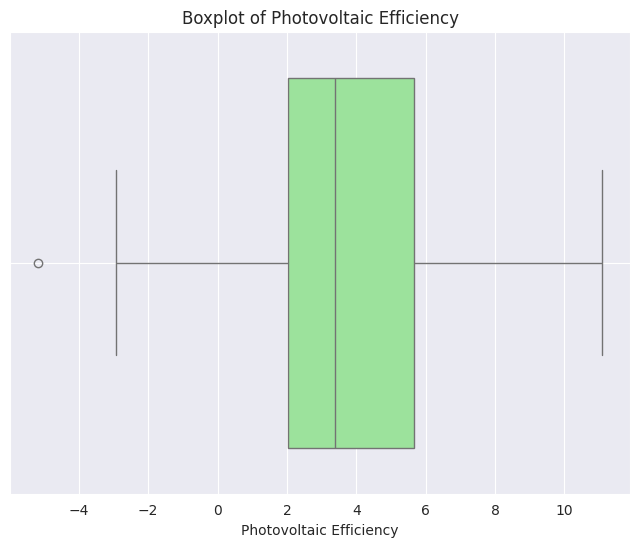

In [13]:
# Boxplot of photovoltaic efficiency
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_df['Value'], color='lightgreen')
plt.title('Boxplot of Photovoltaic Efficiency')
plt.xlabel('Photovoltaic Efficiency')
plt.grid(True)
plt.show()

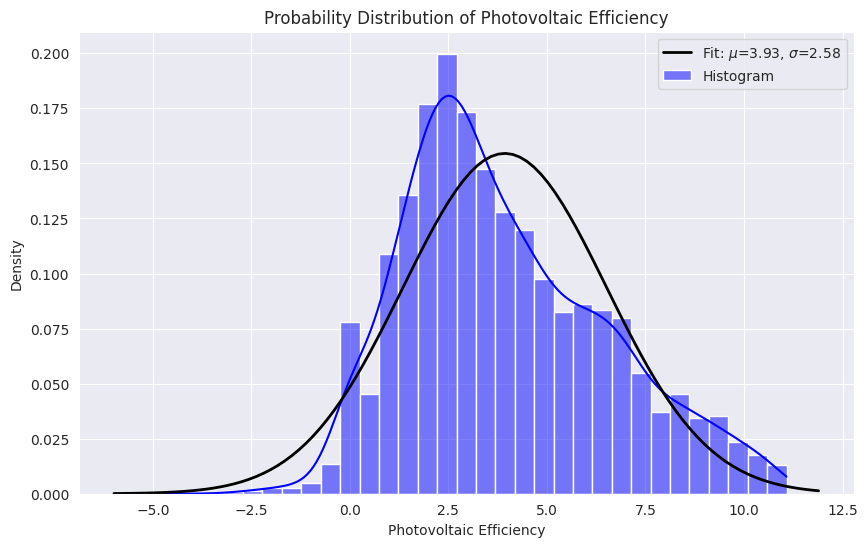

In [14]:
# Fit a probability distribution to the photovoltaic efficiency data
sns.set_style("dark")
plt.figure(figsize=(10, 6))
sns.histplot(data_df['Value'], kde=True, color='blue', stat='density', label='Histogram')

# Fit a normal distribution to the data
mu, std = norm.fit(data_df['Value'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Fit: $\mu$={mu:.2f}, $\sigma$={std:.2f}')

plt.title('Probability Distribution of Photovoltaic Efficiency')
plt.xlabel('Photovoltaic Efficiency')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Set the style




Variance of Molecular_Weight: 3791.4254081578883
Variance of Photovoltaic Efficiency: 6.662546772287612
Standard Deviation of Molecular_Weight: 61.574551627745436
Standard Deviation of Photovoltaic Efficiency: 2.581190960058479
Correlation Coefficient: 0.2547435507429198


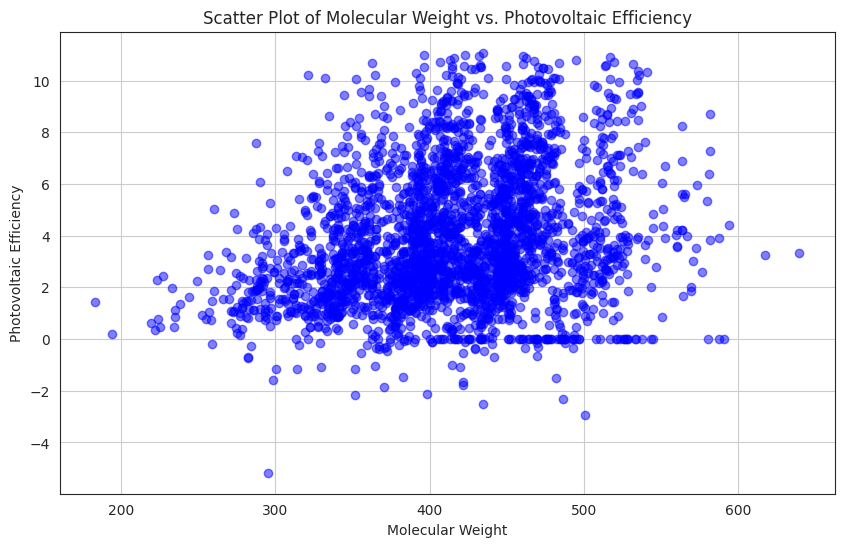

In [15]:
#Scatter plot of Molecular Weight vs. Value

# Calculate variance
variance_num_atoms = np.var(data_df['Molecular_Weight'])
variance_efficiency = np.var(data_df['Value'])

# Calculate standard deviation
std_dev_num_atoms = np.std(data_df['Molecular_Weight'])
std_dev_efficiency = np.std(data_df['Value'])

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(data_df['Molecular_Weight'], data_df['Value'])[0, 1]

print("Variance of Molecular_Weight:", variance_num_atoms)
print("Variance of Photovoltaic Efficiency:", variance_efficiency)
print("Standard Deviation of Molecular_Weight:", std_dev_num_atoms)
print("Standard Deviation of Photovoltaic Efficiency:", std_dev_efficiency)
print("Correlation Coefficient:", correlation_coefficient)


sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.scatter(data_df['Molecular_Weight'], data_df['Value'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Molecular Weight vs. Photovoltaic Efficiency')
plt.xlabel('Molecular Weight')
plt.ylabel('Photovoltaic Efficiency')
plt.grid(True)
plt.show()

Variance of Number of Atoms: 11.9648949866956
Variance of Photovoltaic Efficiency: 6.662546772287612
Standard Deviation of Number of Atoms: 3.4590309317344357
Standard Deviation of Photovoltaic Efficiency: 2.581190960058479
Correlation Coefficient: 0.23045553347789652


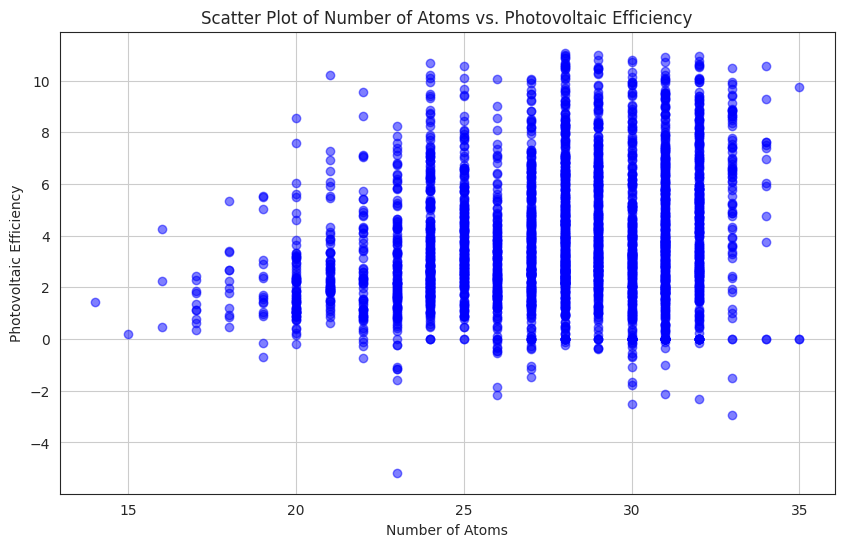

In [16]:
#Scatter plot of Molecular Weight vs. Value
# Calculate variance
variance_num_atoms = np.var(data_df['Num_Atoms'])
variance_efficiency = np.var(data_df['Value'])

# Calculate standard deviation
std_dev_num_atoms = np.std(data_df['Num_Atoms'])
std_dev_efficiency = np.std(data_df['Value'])

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(data_df['Num_Atoms'], data_df['Value'])[0, 1]

print("Variance of Number of Atoms:", variance_num_atoms)
print("Variance of Photovoltaic Efficiency:", variance_efficiency)
print("Standard Deviation of Number of Atoms:", std_dev_num_atoms)
print("Standard Deviation of Photovoltaic Efficiency:", std_dev_efficiency)
print("Correlation Coefficient:", correlation_coefficient)

# sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.scatter(data_df['Num_Atoms'], data_df['Value'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Number of Atoms vs. Photovoltaic Efficiency')
plt.xlabel('Number of Atoms')
plt.ylabel('Photovoltaic Efficiency')
plt.grid(True)
plt.show()


In [27]:
#Vectorization ###


def smiles_to_vector(smiles, radius=2, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    return fingerprint


smiles_data = data_df['SMILES']
# Vectorize SMILES dataset
vectors = [smiles_to_vector(smiles) for smiles in smiles_data]
for i, vector in enumerate(vectors):
    print(f"SMILES: {smiles_data[i]}, Vector: {vector}")

# Create an empty DataFrame
df = pd.DataFrame()

df['SMILES'] = data_df['SMILES']
df['Vector'] =vectors 

# Print the DataFrame
print(df.head())

SMILES: [nH]1c2ccoc2c2sc3cc(-c4ccco4)c4=C[SiH2]C=c4c3c12, Vector: <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7ff6c49f5eb0>
SMILES: c1cc2c3nsnc3c(cc2cn1)C1=Cc2c(C1)ccc1=C[SiH2]C=c21, Vector: <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7ff6c49f54a0>
SMILES: c1sc(C2=Cc3ncc4c5ccccc5c5ccccc5c4c3[SiH2]2)c2occc12, Vector: <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7ff6c4b4a660>
SMILES: [nH]1c2cc(-c3ncncn3)c3=CCC=c3c2c2c3cocc3c3ccc4=CCC=c4c3c12, Vector: <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7ff6c491c270>
SMILES: [nH]1c2cc(oc2c2c3nsnc3c3ccc4=C[SiH2]C=c4c3c12)-c1ccccc1, Vector: <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7ff6c491c040>
SMILES: [nH]1c(cc2Cc3c(sc4cc[nH]c34)-c12)-c1ccccn1, Vector: <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7ff6c491c430>
SMILES: C1C=CC=C1c1cc2c3ccccc3c3c4CC=Cc4cnc3c2c2cscc12, Vector: <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7ff6c491c3c0>
SMILES:

'Click on the photo to zoom it'

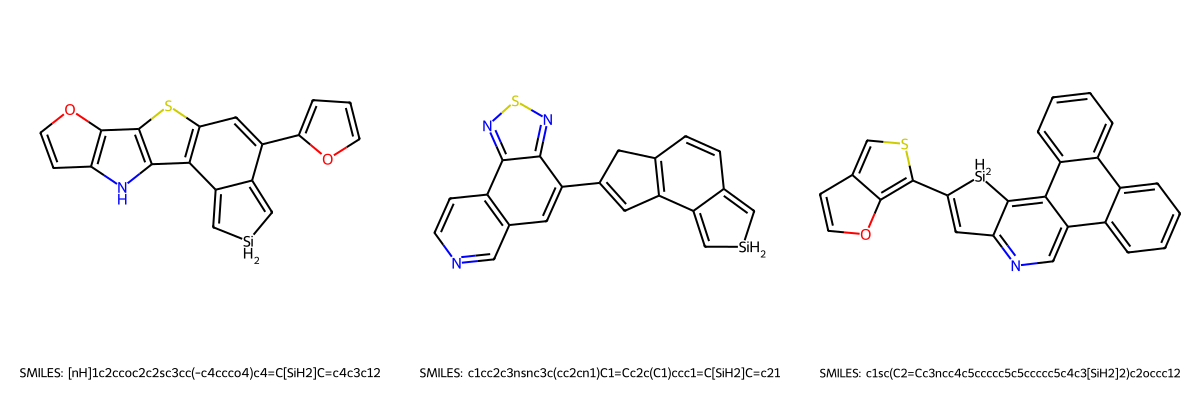

In [18]:
def show_smiles(smiles):
  """
  generate 2D representations of the molecules and color-code them by logP
  :param data_frame: list of smiles
  """
  # Convert the SMILES strings to RDKit molecules
  molecules = [Chem.MolFromSmiles(smile) for smile in smiles]

  # Draw the first molecules
  img = Draw.MolsToGridImage(molecules[:3], molsPerRow=3, subImgSize=(400,400),
                             legends=[f'SMILES: {x}' for x in data_df['SMILES']], 
                             returnPNG=False).save("molecules.png")
                             
  from IPython.display import display, Image
  display("Click on the photo to zoom it")
  display(Image("molecules.png"))

show_smiles(data_df["SMILES"])

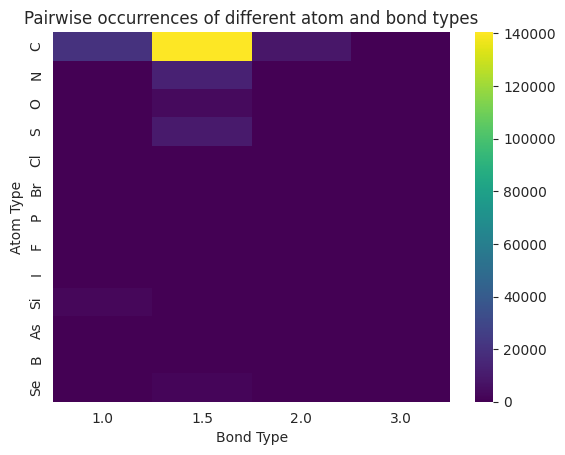

In [19]:
def atom_bond_heatmap(smiles_list):
    """
    The pairwise occurrences of different atom and bond types
    :param smiles_list: A list of SMILES strings
    """
    # Define the atom and bond types to consider
    atom_types = ['C', 'N', 'O', 'S', 'Cl', 'Br', 'P', 'F', 'I', 'Si', 'As', 'B', 'Se']
    bond_types = [1.0, 1.5, 2.0, 3.0]
    # Initialize the data array with zeros
    data = np.zeros((len(atom_types), len(bond_types)))
    for smiles in smiles_list:
        # Convert the SMILES string to a molecule object
        mol = Chem.MolFromSmiles(smiles)
        # Get the atoms and bonds in the molecule
        atoms = mol.GetAtoms()
        bonds = mol.GetBonds()
        # Get the atoms and bonds in the molecule
        for bond in bonds:
            # Get the bond type and index in the bond_types list
            bond_type = bond.GetBondTypeAsDouble()
            bond_idx = bond_types.index(bond_type)
            # Update the data array for each atom in the bond
            for atom in [bond.GetBeginAtom(), bond.GetEndAtom()]:
                # Get the atom type and index in the atom_types list
                atom_type = atom.GetSymbol()
                atom_idx = atom_types.index(atom_type)
                # Increment the count in the data array for the atom-bond pair
                data[atom_idx, bond_idx] += 1
    sns.heatmap(data, xticklabels=bond_types, yticklabels=atom_types,cmap='viridis')
    plt.title('Pairwise occurrences of different atom and bond types')
    plt.xlabel('Bond Type')
    plt.ylabel('Atom Type')

atom_bond_heatmap(data_df["SMILES"])

/tmp/ipykernel_3348/3551223072.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Similarity Score')


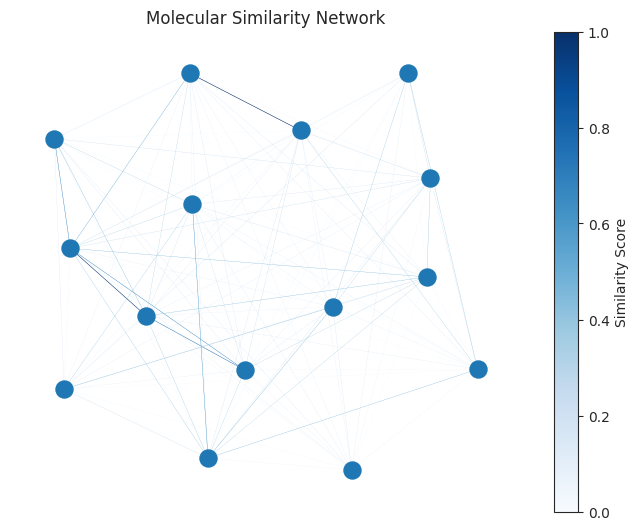

In [20]:
def molecular_similarity(smiles_list):
    # Generate molecular fingerprints using Morgan algorithm with radius=2
    fps = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smiles), 2) for smiles in smiles_list]

    # Calculate pairwise similarity scores using *(Tanimoto similarity coefficient)
    similarity_scores = []
    for fp1, fp2 in combinations(fps, 2):
        similarity_score = DataStructs.TanimotoSimilarity(fp1, fp2)
        similarity_scores.append(similarity_score)

    # Build a similarity network using NetworkX
    G = nx.Graph()
    for idx, smiles in enumerate(smiles_list):
        G.add_node(idx, smiles=smiles)
    for (i, j), weight in zip(combinations(range(len(smiles_list)), 2), similarity_scores):
        G.add_edge(i, j, weight=weight)

    # Visualize the network
    # Visualize the network
    pos = nx.spring_layout(G)
    weights = [edata['weight'] for i, j, edata in G.edges(data=True)]
    nx.draw(G, pos=pos, node_size=150, width=weights, edge_color=weights, edge_cmap=plt.cm.Blues, with_labels=False)
    # Create a ScalarMappable object for creating the colorbar
    sm = ScalarMappable(cmap=plt.cm.Blues)
    sm.set_array([])
    plt.colorbar(sm, label='Similarity Score')

    plt.title('Molecular Similarity Network')
    plt.show()



    # pos = nx.spring_layout(G)
    # nx.draw(G, pos=pos, node_size=150, width=0.3, edge_color='gray', with_labels=False)
    # plt.show()

short_df_for_grahp = data_df.head(15)
molecular_similarity(short_df_for_grahp["SMILES"])

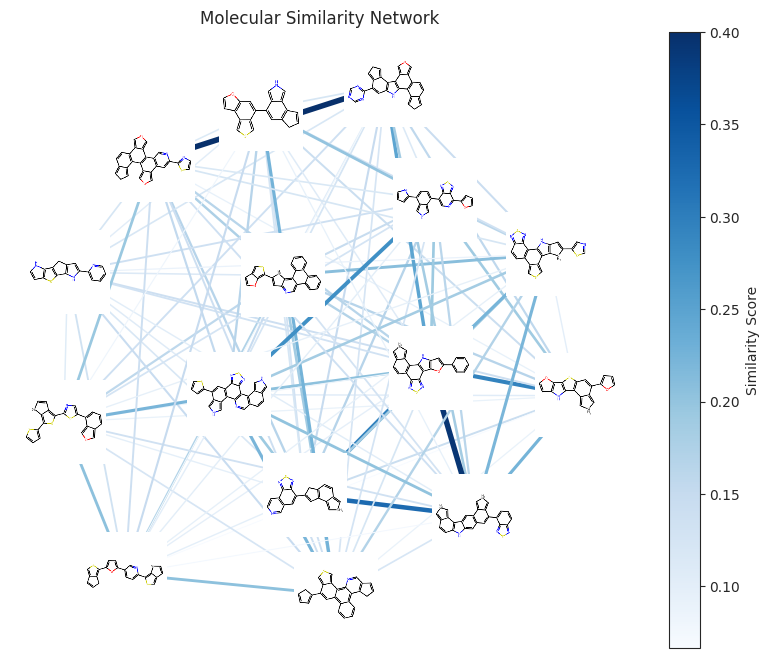

In [21]:
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from rdkit.Chem import AllChem, MolFromSmiles
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def molecular_similarity(smiles_list, edge_scale=5):
    # Generate molecular fingerprints using Morgan algorithm with radius=2
    fps = [AllChem.GetMorganFingerprintAsBitVect(MolFromSmiles(smiles), 2) for smiles in smiles_list]

    # Calculate pairwise similarity scores using Tanimoto similarity coefficient
    similarity_scores = []
    for fp1, fp2 in combinations(fps, 2):
        similarity_score = TanimotoSimilarity(fp1, fp2)
        similarity_scores.append(similarity_score)

    # Build a similarity network using NetworkX
    G = nx.Graph()
    for idx, smiles in enumerate(smiles_list):
        G.add_node(idx, smiles=smiles)

    for (i, j), weight in zip(combinations(range(len(smiles_list)), 2), similarity_scores):
        G.add_edge(i, j, weight=weight)

    # Create a figure and axis
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    # Visualize the network
    pos = nx.spring_layout(G)
    weights = [edata['weight'] for i, j, edata in G.edges(data=True)]

    # Draw nodes as images
    for node_idx in G.nodes:
        smile = G.nodes[node_idx]['smiles']
        molecule = MolFromSmiles(smile)
        img = Draw.MolToImage(molecule, size=(200, 200))  # Increase image size
        imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom for larger images
        ab = AnnotationBbox(imagebox, pos[node_idx], xycoords='data', frameon=False)
        ax.add_artist(ab)

    # Draw edges with scaled widths
    nx.draw_networkx_edges(G, pos=pos, width=[edge_scale * w for w in weights], edge_color=weights, edge_cmap=plt.cm.Blues)

    # Hide axis
    ax.axis('off')

    # Show the colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label('Similarity Score')

    plt.title('Molecular Similarity Network')
    plt.show()

# Example usage
short_df_for_graph = data_df.head(15)
molecular_similarity(short_df_for_graph["SMILES"], edge_scale=10)  # Adjust edge_scale as needed
